In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data and give its summary
ratings = pd.read_csv("/Users/aryamane/Downloads/final_ratings_cleaned.csv")
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])

print("Total ratings:", len(ratings))
print("Unique users:", ratings['user_id'].nunique())
print("Unique products:", ratings['product_id'].nunique())
print("\nSample rows:\n", ratings.head())



/var/folders/k2/5hcbwx856_z5_q1m7ly2q4mm0000gn/T/ipykernel_23622/3228432044.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])


Total ratings: 60095
Unique users: 4858
Unique products: 1000

Sample rows:
                                 user_id signup_date  \
0  507cde64-9f17-403b-9abe-b9a4aaec9615     5/16/21   
1  507cde64-9f17-403b-9abe-b9a4aaec9615     5/16/21   
2  507cde64-9f17-403b-9abe-b9a4aaec9615     5/16/21   
3  507cde64-9f17-403b-9abe-b9a4aaec9615     5/16/21   
4  507cde64-9f17-403b-9abe-b9a4aaec9615     5/16/21   

                             product_id  rating           timestamp  
0  b04e491b-049a-44da-b156-19f637c4a715       3 2021-08-07 15:57:00  
1  69d3887c-609f-497d-9184-29dd24508c94       5 2021-10-12 22:28:00  
2  fbcb6715-a28d-4e88-bded-b84b8b73651a       3 2022-04-06 09:43:00  
3  ca232b47-71b5-4a1d-926f-92585cfa4c0f       5 2021-11-17 05:32:00  
4  e7951d86-ed64-4512-a864-8eba1651f5c8       5 2022-04-10 17:48:00  


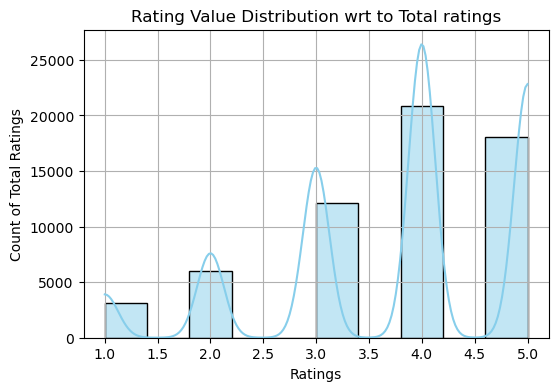

In [95]:
#  RATINGS DISTRIBUTION AS PER TOTAL RATINGS
plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title("Rating Value Distribution wrt to Total ratings")
plt.xlabel("Ratings")
plt.ylabel("Count of Total Ratings")
plt.grid(True)
plt.show()


Avg ratings per user: 12.370317002881844


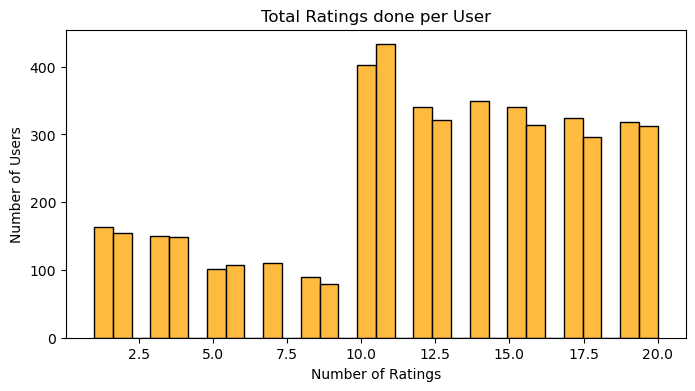

In [97]:
# TOTAL RATINGS DONE PER USER 
user_counts = ratings['user_id'].value_counts()
print("\nAvg ratings per user:", user_counts.mean())

plt.figure(figsize=(8,4))
sns.histplot(user_counts, bins=30, kde=False, color='orange')
plt.title("Total Ratings done per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


Avg ratings given per user: 3.746558344222876


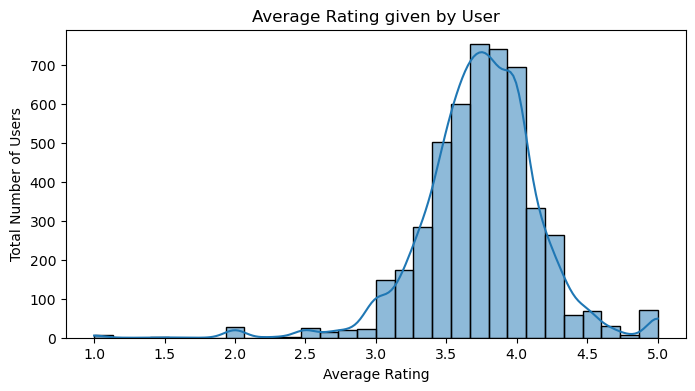

In [99]:
#  AVERAGE RATING GIVEN BY USER 
avg_user_rating = ratings.groupby('user_id')['rating'].mean()
print("\nAvg ratings given per user:",avg_user_rating.mean())
plt.figure(figsize=(8,4))
sns.histplot(avg_user_rating, bins=30, kde=True)
plt.title("Average Rating given by User")
plt.xlabel("Average Rating")
plt.ylabel("Total Number of Users")
plt.show()


Avg ratings per product: 60.095


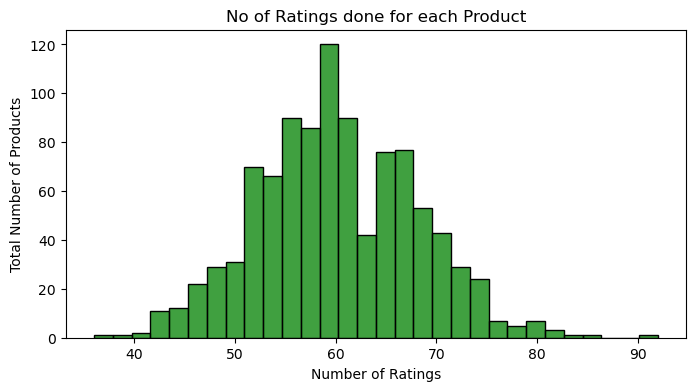

In [101]:
# RATINGS DONE FOR EACH PRODUCT
product_counts = ratings['product_id'].value_counts()
print("\nAvg ratings per product:", product_counts.mean())

plt.figure(figsize=(8,4))
sns.histplot(product_counts, bins=30, kde=False, color='green')
plt.title("No of Ratings done for each Product")
plt.xlabel("Number of Ratings")
plt.ylabel("Total Number of Products")
plt.show()

/var/folders/k2/5hcbwx856_z5_q1m7ly2q4mm0000gn/T/ipykernel_23622/1831656833.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings['signup_date'] = pd.to_datetime(ratings['signup_date'])


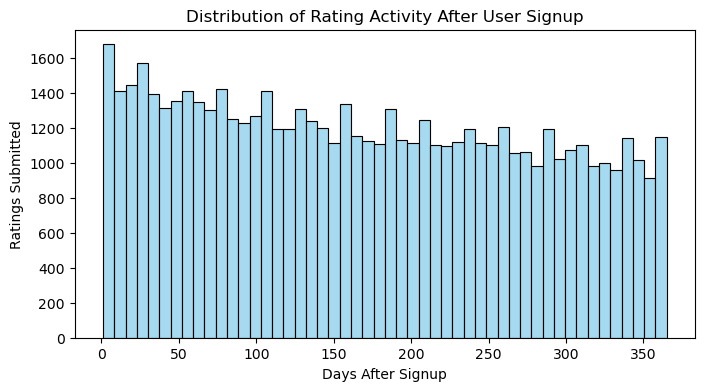

In [103]:
# User Activity After Signup
ratings['signup_date'] = pd.to_datetime(ratings['signup_date'])
ratings['days_since_signup'] = (ratings['timestamp'] - ratings['signup_date']).dt.days
plt.figure(figsize=(8,4))
sns.histplot(ratings['days_since_signup'], bins=50, color='skyblue')
plt.title("Distribution of Rating Activity After User Signup")
plt.xlabel("Days After Signup")
plt.ylabel("Ratings Submitted")
plt.show()

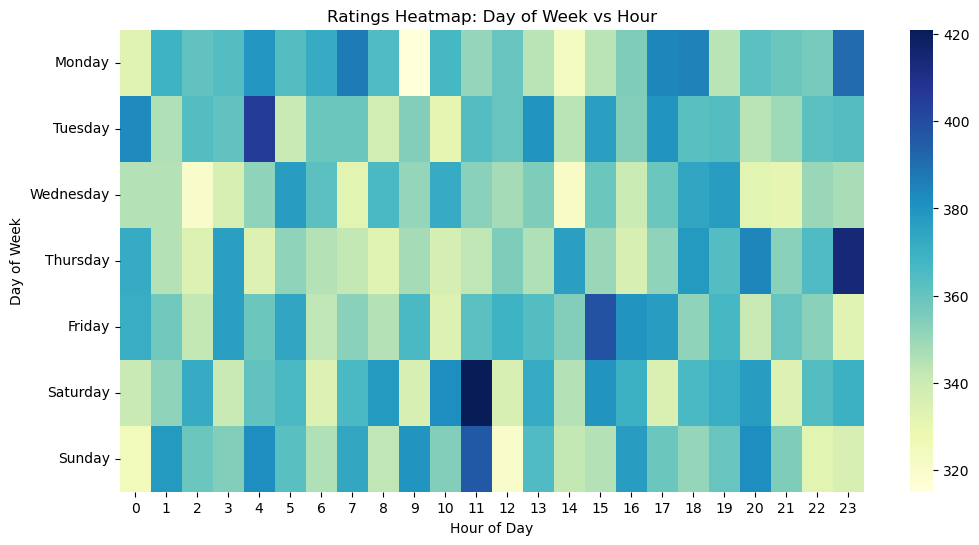

In [105]:
#Weekly Ratings Heatmap

ratings['day_of_week'] = ratings['timestamp'].dt.day_name()
ratings['hour'] = ratings['timestamp'].dt.hour
heatmap_data = ratings.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Ratings Heatmap: Day of Week vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

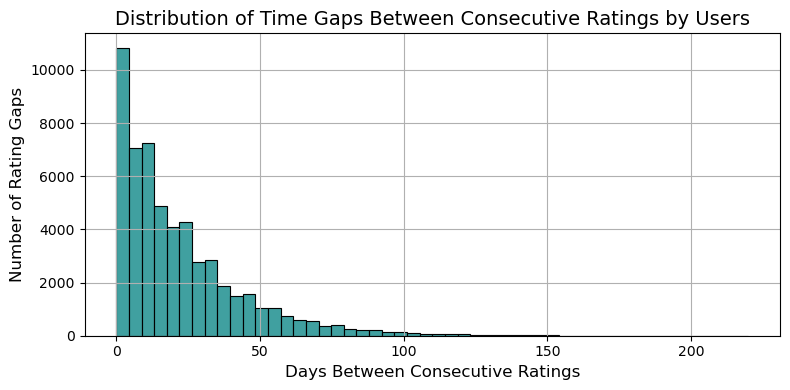

In [107]:
#Time Gap Between Ratings (User-Level)

ratings_sorted = ratings.sort_values(by=['user_id', 'timestamp'])
ratings_sorted['prev_time'] = ratings_sorted.groupby('user_id')['timestamp'].shift()
ratings_sorted['gap_days'] = (ratings_sorted['timestamp'] - ratings_sorted['prev_time']).dt.days

plt.figure(figsize=(8,4))
sns.histplot(ratings_sorted['gap_days'].dropna(), bins=50, color='teal')
plt.title("Distribution of Time Gaps Between Consecutive Ratings by Users", fontsize=14)
plt.xlabel("Days Between Consecutive Ratings", fontsize=12)
plt.ylabel("Number of Rating Gaps", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
